In [1]:
import anndata
import numpy as np
import pandas as pd
import plotnine as p
import matplotlib.pyplot as plt
import scvi
from scvi.model.utils import mde
import scHPL
import torch

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

/home/e/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
/home/e/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
/home/e/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
/home/e/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
Global seed set to 0
/home/e/.local/lib/python3.10/site-packages/chex/_src/pytypes.py:37: FutureWarning: jax.tree_structure is deprecated, and will be removed in a future release. Use jax.tree_util.tree_structure instead.


In [2]:
adata = anndata.read_h5ad('imyoo_capillary_blood_samples_76535_pbmcs.h5ad')
adata

AnnData object with n_obs × n_vars = 76535 × 36601
    obs: 'barcode', 'Sample IDs', 'Participant IDs', 'Cell Barcoding Runs', 'Lane', 'extraction_protocol', 'sample_processing_delay_seconds', 'cell_barcoding_delay_days', 'cell_barcoding_protocol', 'run_lane_batch', 'cell_type_level_1', 'cell_type_level_2', 'cell_type_level_3', 'cell_type_level_4', 'c1', 'c2', 'c3', 'c4', 'original_sample_id'
    var: 'name', 'id'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'tsne', 'umap'
    obsm: 'X_mde', 'X_scvi', 'X_tsne', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [3]:
(
    adata
    .obs
    .groupby(
        ['Cell Barcoding Runs', 'Sample IDs', 'Participant IDs'],
        observed = True
    )
    .size()
    .rename('#')
    .reset_index()
)

Cell Barcoding Runs  Sample IDs  Participant IDs     #
0                    28          20                2  1148
1                    40          95                3  4575
2                    40         424                2  4450
3                    41         329               51  7126
4                    62         892                3  2605
5                    62         894                2  1659
6                    62         909                2   924
7                    62         911                3  1154
8                    62         952                2  1415
9                    62         953                3  2401
10                   62         958                2  1392
11                   62         959                3  1805
12                   62         970                2  3590
13                   62         971                3  3827
14                   62         977                2  1677
15                   62         978                3  2032
16                   62        1004                3  4612
17                   62        1005                2  2374
18                   62        1071                2  2689
19                   62        1072                3  3342
20                   62        1170                2  4977
21                   62        1171                3  5178
22                   62        1176                2  1527
23                   62        1177                3  2166
24                   77        1382                2  1560
25                   77        1385                2  1535
26                   77        1394                3  2773
27                   77        1395                3  2022

In [4]:
(
    adata
    .obs
    .groupby(
        ['cell_type_level_2', 'cell_type_level_3', 'cell_type_level_4', 'Participant IDs'],
        observed = True
    )
    .size()
    .rename('#')
    .reset_index()
)

cell_type_level_2    cell_type_level_3       cell_type_level_4  \
0            T Cells          CD4 T Cells       CD4 Naive T Cells   
1            T Cells          CD4 T Cells       CD4 Naive T Cells   
2            T Cells          CD4 T Cells       CD4 Naive T Cells   
3            T Cells          CD4 T Cells      CD4 Memory T Cells   
4            T Cells          CD4 T Cells      CD4 Memory T Cells   
5            T Cells          CD4 T Cells      CD4 Memory T Cells   
6            T Cells          CD4 T Cells  CD4 Regulatory T Cells   
7            T Cells          CD4 T Cells  CD4 Regulatory T Cells   
8            T Cells          CD4 T Cells  CD4 Regulatory T Cells   
9            T Cells          CD4 T Cells   CD4 Cytotoxic T Cells   
10           T Cells          CD4 T Cells   CD4 Cytotoxic T Cells   
11           T Cells          CD4 T Cells   CD4 Cytotoxic T Cells   
12           T Cells  Gamma-Delta T Cells   Gamma-Delta T Cells 2   
13           T Cells  Gamma-Delta T Cells   Gamma-Delta T Cells 2   
14           T Cells  Gamma-Delta T Cells   Gamma-Delta T Cells 2   
15           T Cells  Gamma-Delta T Cells   Gamma-Delta T Cells 1   
16           T Cells  Gamma-Delta T Cells   Gamma-Delta T Cells 1   
17           T Cells  Gamma-Delta T Cells   Gamma-Delta T Cells 1   
18           T Cells  Gamma-Delta T Cells   Gamma-Delta T Cells 3   
19           T Cells  Gamma-Delta T Cells   Gamma-Delta T Cells 3   
20           T Cells  Gamma-Delta T Cells   Gamma-Delta T Cells 3   
21           T Cells          CD8 T Cells      CD8 Memory T Cells   
22           T Cells          CD8 T Cells      CD8 Memory T Cells   
23           T Cells          CD8 T Cells      CD8 Memory T Cells   
24           T Cells          CD8 T Cells   CD8 Cytotoxic T Cells   
25           T Cells          CD8 T Cells   CD8 Cytotoxic T Cells   
26           T Cells          CD8 T Cells   CD8 Cytotoxic T Cells   
27           T Cells          CD8 T Cells       CD8 Naive T Cells   
28           T Cells          CD8 T Cells       CD8 Naive T Cells   
29           T Cells          CD8 T Cells       CD8 Naive T Cells   

    Participant IDs     #  
0                 2  2391  
1                 3  7733  
2                51  1017  
3                 2  4854  
4                 3  3718  
5                51  1249  
6                 2  1003  
7                 3  1204  
8                51   207  
9                 2   145  
10                3    11  
11               51     2  
12                2   111  
13                3   151  
14               51    41  
15                2   404  
16                3   260  
17               51   109  
18                2   327  
19                3   393  
20               51   128  
21                2  1212  
22                3   823  
23               51   540  
24                2  1986  
25                3   162  
26               51   375  
27                2  1312  
28                3  3247  
29               51   979

In [5]:
adata.obs['Participant IDs'].value_counts()

3     38492
2     30917
51     7126
Name: Participant IDs, dtype: int64

In [6]:
scvi.model.SCVI.setup_anndata(
    adata,
    batch_key='Sample IDs',
)

model = scvi.model.SCVI(
    adata, 
    n_layers = 2,
    gene_likelihood = 'nb'
)

model.view_anndata_setup()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Anndata setup with scvi-tools version 0.20.3.

Setup via `SCVI.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'Sample IDs',
│   'labels_key': None,
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │  28   │
│         n_cells          │ 76535 │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   1   │
│          n_vars          │ 36601 │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                     batch State Registry                     
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location     ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Sample IDs'] │     20     │          0          │
│                         │     95     │          1          │
│                         │    329     │          2          │
│                         │    424     │          3          │
│                         │    892     │          4          │
│                         │    894     │          5          │
│                         │    909     │          6          │
│                         │    911     │          7          │
│                         │    952     │          8          │
│                         │    953     │          9          │
│                         │    958     │         10          │
│                         │    959     │         11          │
│                         │    970     │         12          │
│                         │    971     │         13          │
│                         │    977     │         14          │
│                         │    978     │         15          │
│                         │    1004    │         16          │
│                         │    1005    │         17          │
│                         │    1071    │         18          │
│                         │    1072    │         19          │
│                         │    1170    │         20          │
│                         │    1171    │         21          │
│                         │    1176    │         22          │
│                         │    1177    │         23          │
│                         │    1382    │         24          │
│                         │    1385    │         25          │
│                         │    1394    │         26          │
│                         │    1395    │         27          │
└─────────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

In [7]:
model.train(50, check_val_every_n_epoch = 1)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|██████████| 50/50 [05:08<00:00,  6.07s/it, loss=7.89e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [05:08<00:00,  6.17s/it, loss=7.89e+03, v_num=1]


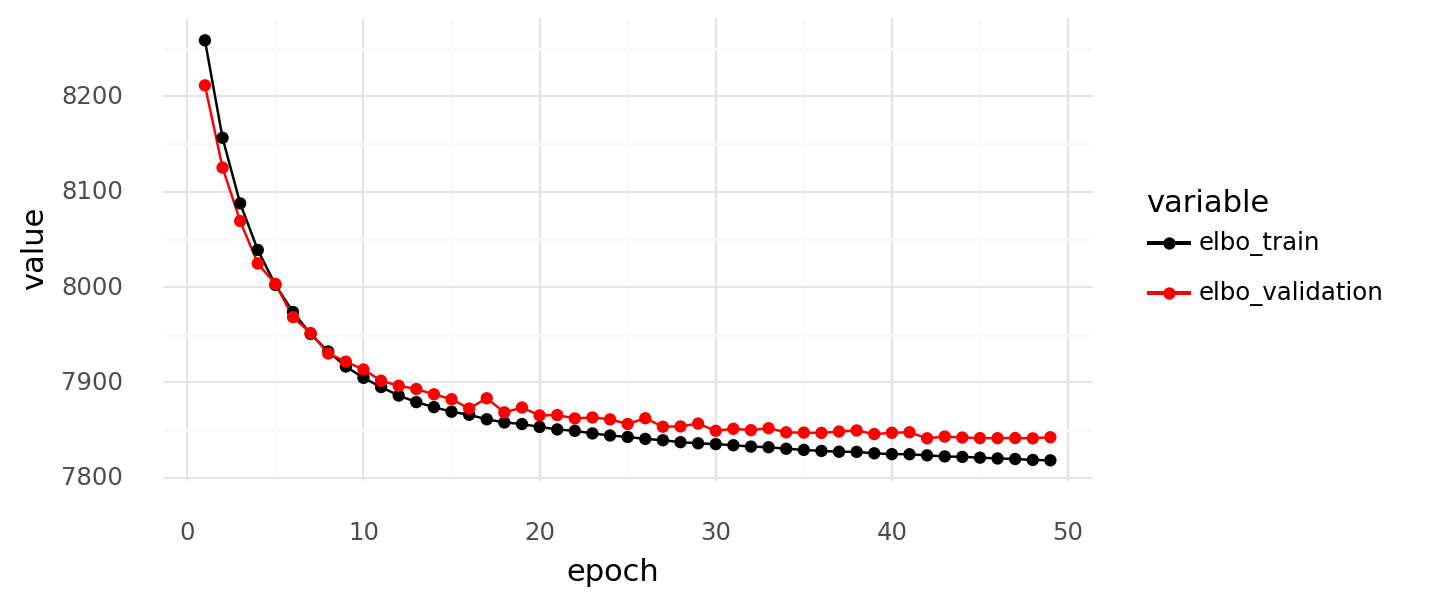

In [8]:
history_df = (
    model.history['elbo_train'].astype(float)
    .join(model.history['elbo_validation'].astype(float))
    .reset_index()
    .melt(id_vars = ['epoch'])
)

p.options.figure_size = 6, 3

p_ = (
    p.ggplot(p.aes(x = 'epoch', y = 'value', color = 'variable'), history_df.query('epoch > 0'))
    + p.geom_line()
    + p.geom_point()
    + p.scale_color_manual({'elbo_train': 'black', 'elbo_validation': 'red'})
    + p.theme_minimal()
)

p_.save('fig1.png', dpi = 300)

print(p_)

In [9]:
(
    adata
    .obs
    .groupby(
        ['cell_type_level_1', 'cell_type_level_2', 'cell_type_level_3', 'cell_type_level_4'],
        observed = True,
        dropna = False
    )
    .size()
    .rename('#')
    .reset_index()
)

cell_type_level_1 cell_type_level_2    cell_type_level_3  \
0          Lymphoid           T Cells          CD4 T Cells   
1          Lymphoid           T Cells          CD4 T Cells   
2          Lymphoid           T Cells          CD4 T Cells   
3          Lymphoid           T Cells          CD4 T Cells   
4          Lymphoid           T Cells  Gamma-Delta T Cells   
5          Lymphoid           T Cells  Gamma-Delta T Cells   
6          Lymphoid           T Cells  Gamma-Delta T Cells   
7          Lymphoid           T Cells          CD8 T Cells   
8          Lymphoid           T Cells          CD8 T Cells   
9          Lymphoid           T Cells          CD8 T Cells   

        cell_type_level_4      #  
0       CD4 Naive T Cells  11141  
1      CD4 Memory T Cells   9821  
2  CD4 Regulatory T Cells   2414  
3   CD4 Cytotoxic T Cells    158  
4   Gamma-Delta T Cells 2    303  
5   Gamma-Delta T Cells 1    773  
6   Gamma-Delta T Cells 3    848  
7      CD8 Memory T Cells   2575  
8   CD8 Cytotoxic T Cells   2523  
9       CD8 Naive T Cells   5538

In [10]:
for i in range(1, 4 + 1):
    adata.obs[f'cell_type_level_{i}'] = adata.obs[f'cell_type_level_{i}'].pipe(np.array)

In [11]:
# Propagate upper level labels

adata.obs.loc[adata.obs.query('cell_type_level_1.isna()').index, 'cell_type_level_1'] = 'root'

for i in range(2, 4 + 1):
    idx_ = adata.obs.query(f'cell_type_level_{i}.isna()').index
    adata.obs.loc[idx_, f'cell_type_level_{i}'] = adata.obs.loc[idx_][f'cell_type_level_{i - 1}'].values

In [12]:
(
    adata
    .obs
    .groupby(
        ['cell_type_level_1', 'cell_type_level_2', 'cell_type_level_3', 'cell_type_level_4'],
        observed = True,
        dropna = False
    )
    .size()
    .rename('#')
    .reset_index()
)

cell_type_level_1                  cell_type_level_2  \
0           Lymphoid                            B Cells   
1           Lymphoid                            B Cells   
2           Lymphoid                            B Cells   
3           Lymphoid                            B Cells   
4           Lymphoid                            B Cells   
5           Lymphoid                            B Cells   
6           Lymphoid               Lymphoid Progenitors   
7           Lymphoid                           NK Cells   
8           Lymphoid                           NK Cells   
9           Lymphoid                           NK Cells   
10          Lymphoid       Proliferating Lymphoid Cells   
11          Lymphoid                            T Cells   
12          Lymphoid                            T Cells   
13          Lymphoid                            T Cells   
14          Lymphoid                            T Cells   
15          Lymphoid                            T Cells   
16          Lymphoid                            T Cells   
17          Lymphoid                            T Cells   
18          Lymphoid                            T Cells   
19          Lymphoid                            T Cells   
20          Lymphoid                            T Cells   
21          Lymphoid                            T Cells   
22           Myeloid                    Dendritic Cells   
23           Myeloid                    Dendritic Cells   
24           Myeloid                    Dendritic Cells   
25           Myeloid                    Dendritic Cells   
26           Myeloid                    Dendritic Cells   
27           Myeloid                       Granulocytes   
28           Myeloid                          Monocytes   
29           Myeloid                          Monocytes   
30           Myeloid                          Monocytes   
31           Myeloid                          Monocytes   
32           Myeloid                Myeloid Progenitors   
33          Non-WBCs                             Debris   
34          Non-WBCs  High Mitochondrial Genes artifact   
35          Non-WBCs          Lymphoid - Batch artifact   
36          Non-WBCs                         Multiplets   
37          Non-WBCs               Multiplets - Cycling   
38          Non-WBCs           Myeloid - Batch artifact   
39          Non-WBCs                          Platelets   
40          Non-WBCs                               RBCs   
41          Non-WBCs                            Unknown   
42              root                               root   

                       cell_type_level_3  \
0                 Age-associated B Cells   
1                 CLL-associated B Cells   
2               Classical Memory B Cells   
3                     IgM Memory B Cells   
4                          Naive B Cells   
5                         Plasma B Cells   
6                   Lymphoid Progenitors   
7                      Adaptive NK Cells   
8                   CD56 Bright NK Cells   
9                      CD56 Dim NK Cells   
10          Proliferating Lymphoid Cells   
11                           CD4 T Cells   
12                           CD4 T Cells   
13                           CD4 T Cells   
14                           CD4 T Cells   
15                           CD8 T Cells   
16                           CD8 T Cells   
17                           CD8 T Cells   
18                   Gamma-Delta T Cells   
19                   Gamma-Delta T Cells   
20                   Gamma-Delta T Cells   
21  Mucosal-Associated Invariant T Cells   
22                                  asDC   
23                                  cDC2   
24                                  cDC3   
25                                   pDC   
26                               tumorDC   
27                            Mast Cells   
28                   Classical Monocytes   
29    Classical Monocytes - HSP artifact   
30                Intermediate Monocytes  

In [13]:
# Empty dicts indicates leaves.
tree = {
    'root': {
        'Lymphoid': {
            'T Cells': {
                'Mucosal-Associated Invariant T Cells': {},
                'Gamma-Delta T Cells': {
                            'Gamma-Delta T Cells 1': {},
                            'Gamma-Delta T Cells 2': {},
                            'Gamma-Delta T Cells 3': {},
                },
                'CD8 T Cells': {
                            'CD8 Memory T Cells': {},
                            'CD8 Cytotoxic T Cells': {},
                            'CD8 Naive T Cells': {},
                },
                'CD4 T Cells': {
                            'CD4 Naive T Cells': {},
                            'CD4 Memory T Cells': {},
                            'CD4 Regulatory T Cells': {},
                            'CD4 Naive T Cells': {},                    
                            'CD4 Regulatory T Cells': {},
                            'CD4 Cytotoxic T Cells': {}
                }          
            },

            'NK Cells': {
                'CD56 Dim NK Cells': {},
                'Adaptive NK Cells': {},
                'CD56 Bright NK Cells': {}
            },
            'B Cells': {
                'Naive B Cells': {},
                'IgM Memory B Cells': {},
                'Plamsa B Cells': {},
                'Age-associated B Cells': {},
                'Classical Memory B Cells': {},
                'CLL-associated B Cells': {},
            },    
            'Lymphoid Progenitors': {}
        },
        'Myeloid': {
            'Monocytes': {
                'Classical Monocytes': {},
                'Intermediate Monocytes': {},
                'Classical Monocytes HSP artifact': {},
                'Nonclassical Monocytes': {}
            },
            'Dendritic Cells': {
                'asDC': {},
                'pDC': {},
                'cDC3': {},
                'tumorDC': {}
            },

            'Granulocytes': {
                'Mast Cells': {}
            },
            'Myeloid Progenitors': {}
        }
    }
}

# This lets you define trees as a dict of dicts. It converts it to a Newick string that you can give to scHPL

def dict2newick(tree, name):
    
    if len(tree[name]) == 0:
        return f'{name}'
    
    else:
        child_strings = [dict2newick(tree[name], child) for child in tree[name]]
        return f'({", ".join(child_strings)}){name}'

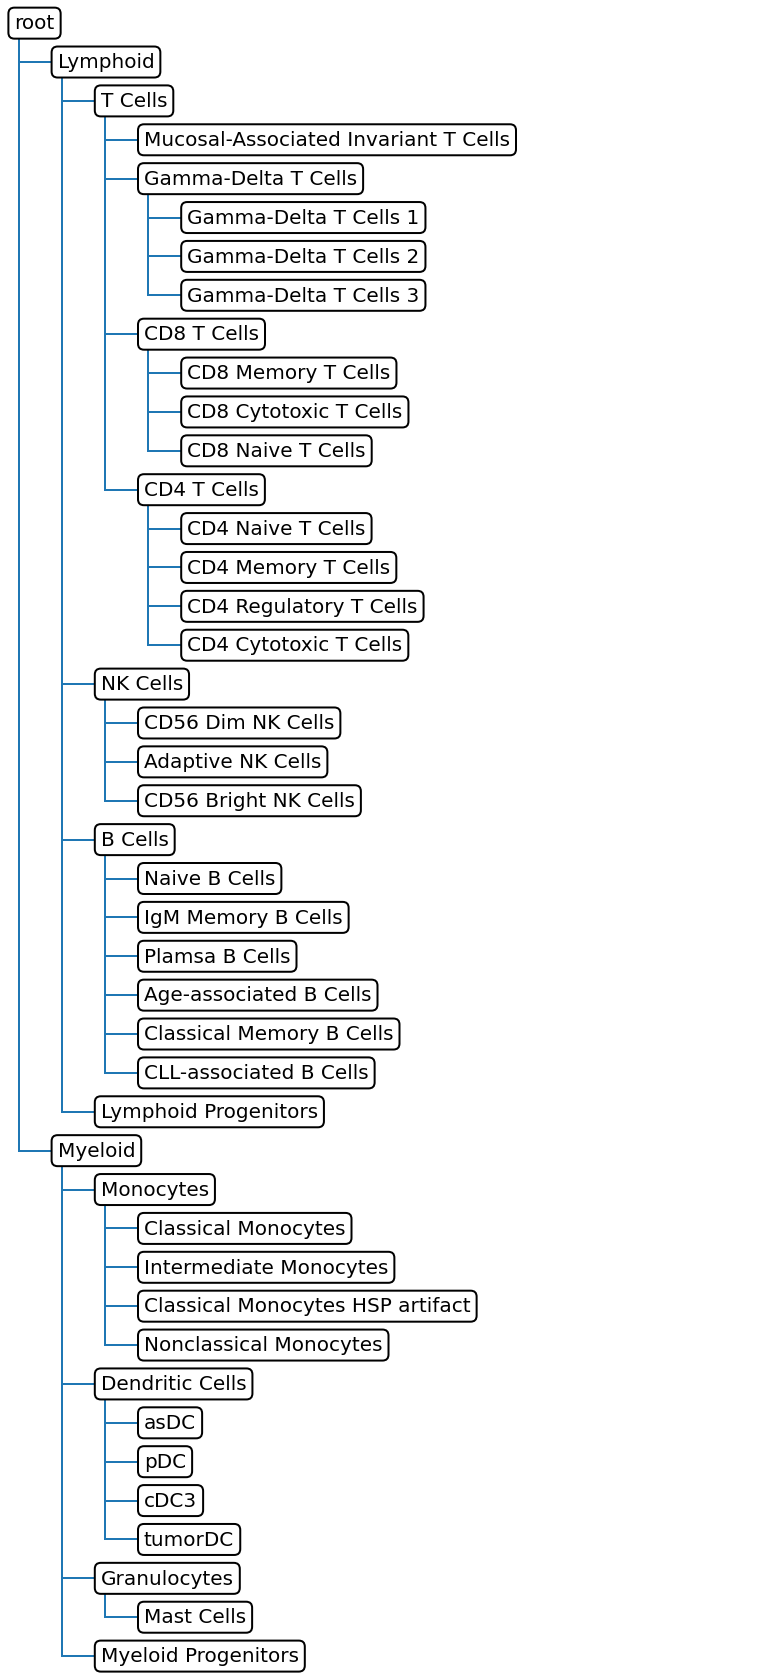

In [16]:
tree1 = scHPL.utils.create_tree(dict2newick(tree, 'root'))
scHPL.utils.print_tree(tree1)

In [17]:
adata.obsm['X_scvi'] = model.get_latent_representation(adata)

In [18]:
adata.obsm['X_mde'] = scvi.model.utils.mde(adata.obsm['X_scvi'])

In [19]:
for i, y in enumerate(adata.obsm['X_mde'].T):
    adata.obs[f'mde_{i + 1}'] = y

In [20]:
adata.obs['tree_label'] = adata.obs['cell_type_level_4']

In [21]:
# We are ignoring known labels for participant 51, so here we rename these

adata.obs.loc[adata.obs.query('`Participant IDs` == 51').index, 'tree_label'] = 'Unknown'

In [22]:
adata.obs['participant_ids'] = adata.obs['Participant IDs']

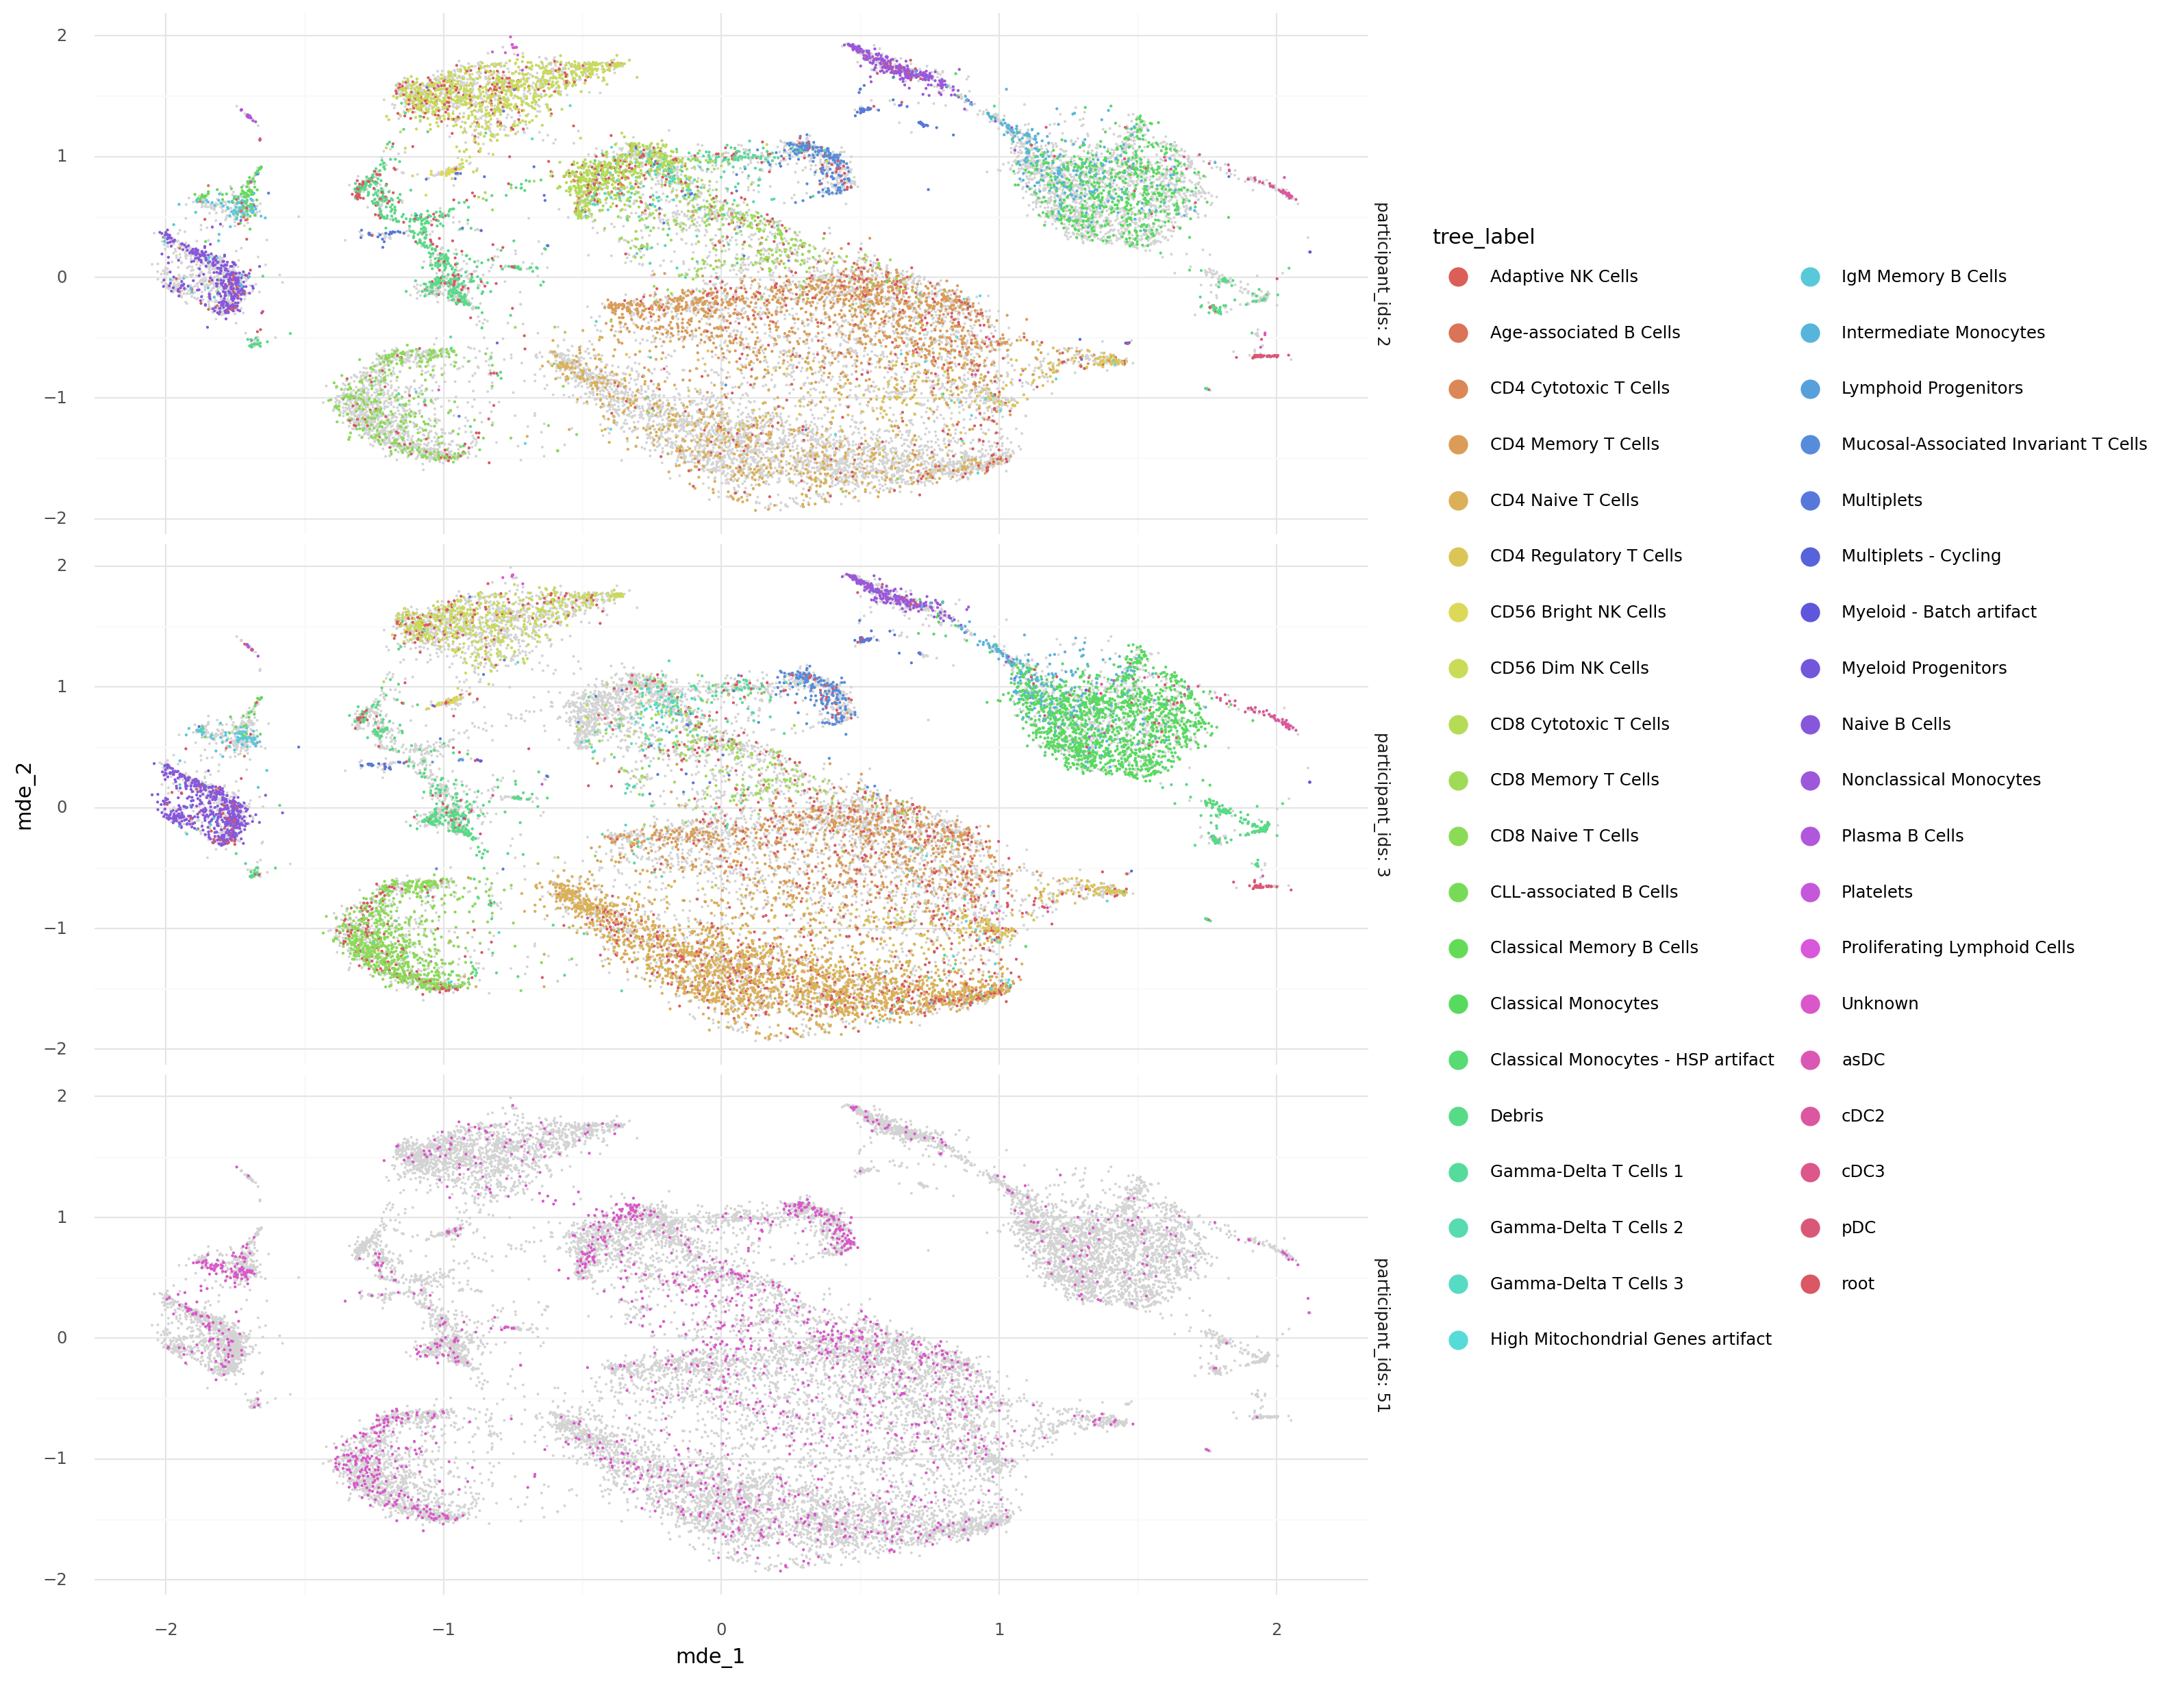

In [23]:
p.options.figure_size = 12, 15

tmp_ = adata.obs.sample(20_000)

p_ = (
    p.ggplot(p.aes(x = 'mde_1', y = 'mde_2', color = 'tree_label'), tmp_)
    + p.geom_point(shape = '.', size = 0.1, color = 'lightgrey', data = tmp_.drop(['participant_ids'], axis = 1))
    + p.geom_point(shape = '.', size = 0.2)
    + p.theme_minimal()
    + p.guides(color = p.guide_legend(override_aes = {'size': 10}))
    + p.facet_grid('participant_ids ~ .', labeller = 'label_both')
)

p_.save('fig3.png', dpi = 300)

print(p_)

In [24]:
adata_train = adata[adata.obs.query('participant_ids != 51').index].copy()

In [25]:
trained_tree = scHPL.train_tree(
    adata_train.obsm['X_scvi'],
    adata_train.obs['tree_label'],
    tree1,
    dimred = False,
    useRE = False
)

In [26]:
adata.obs['predicted_label'] = scHPL.predict_labels(adata.obsm['X_scvi'], trained_tree)

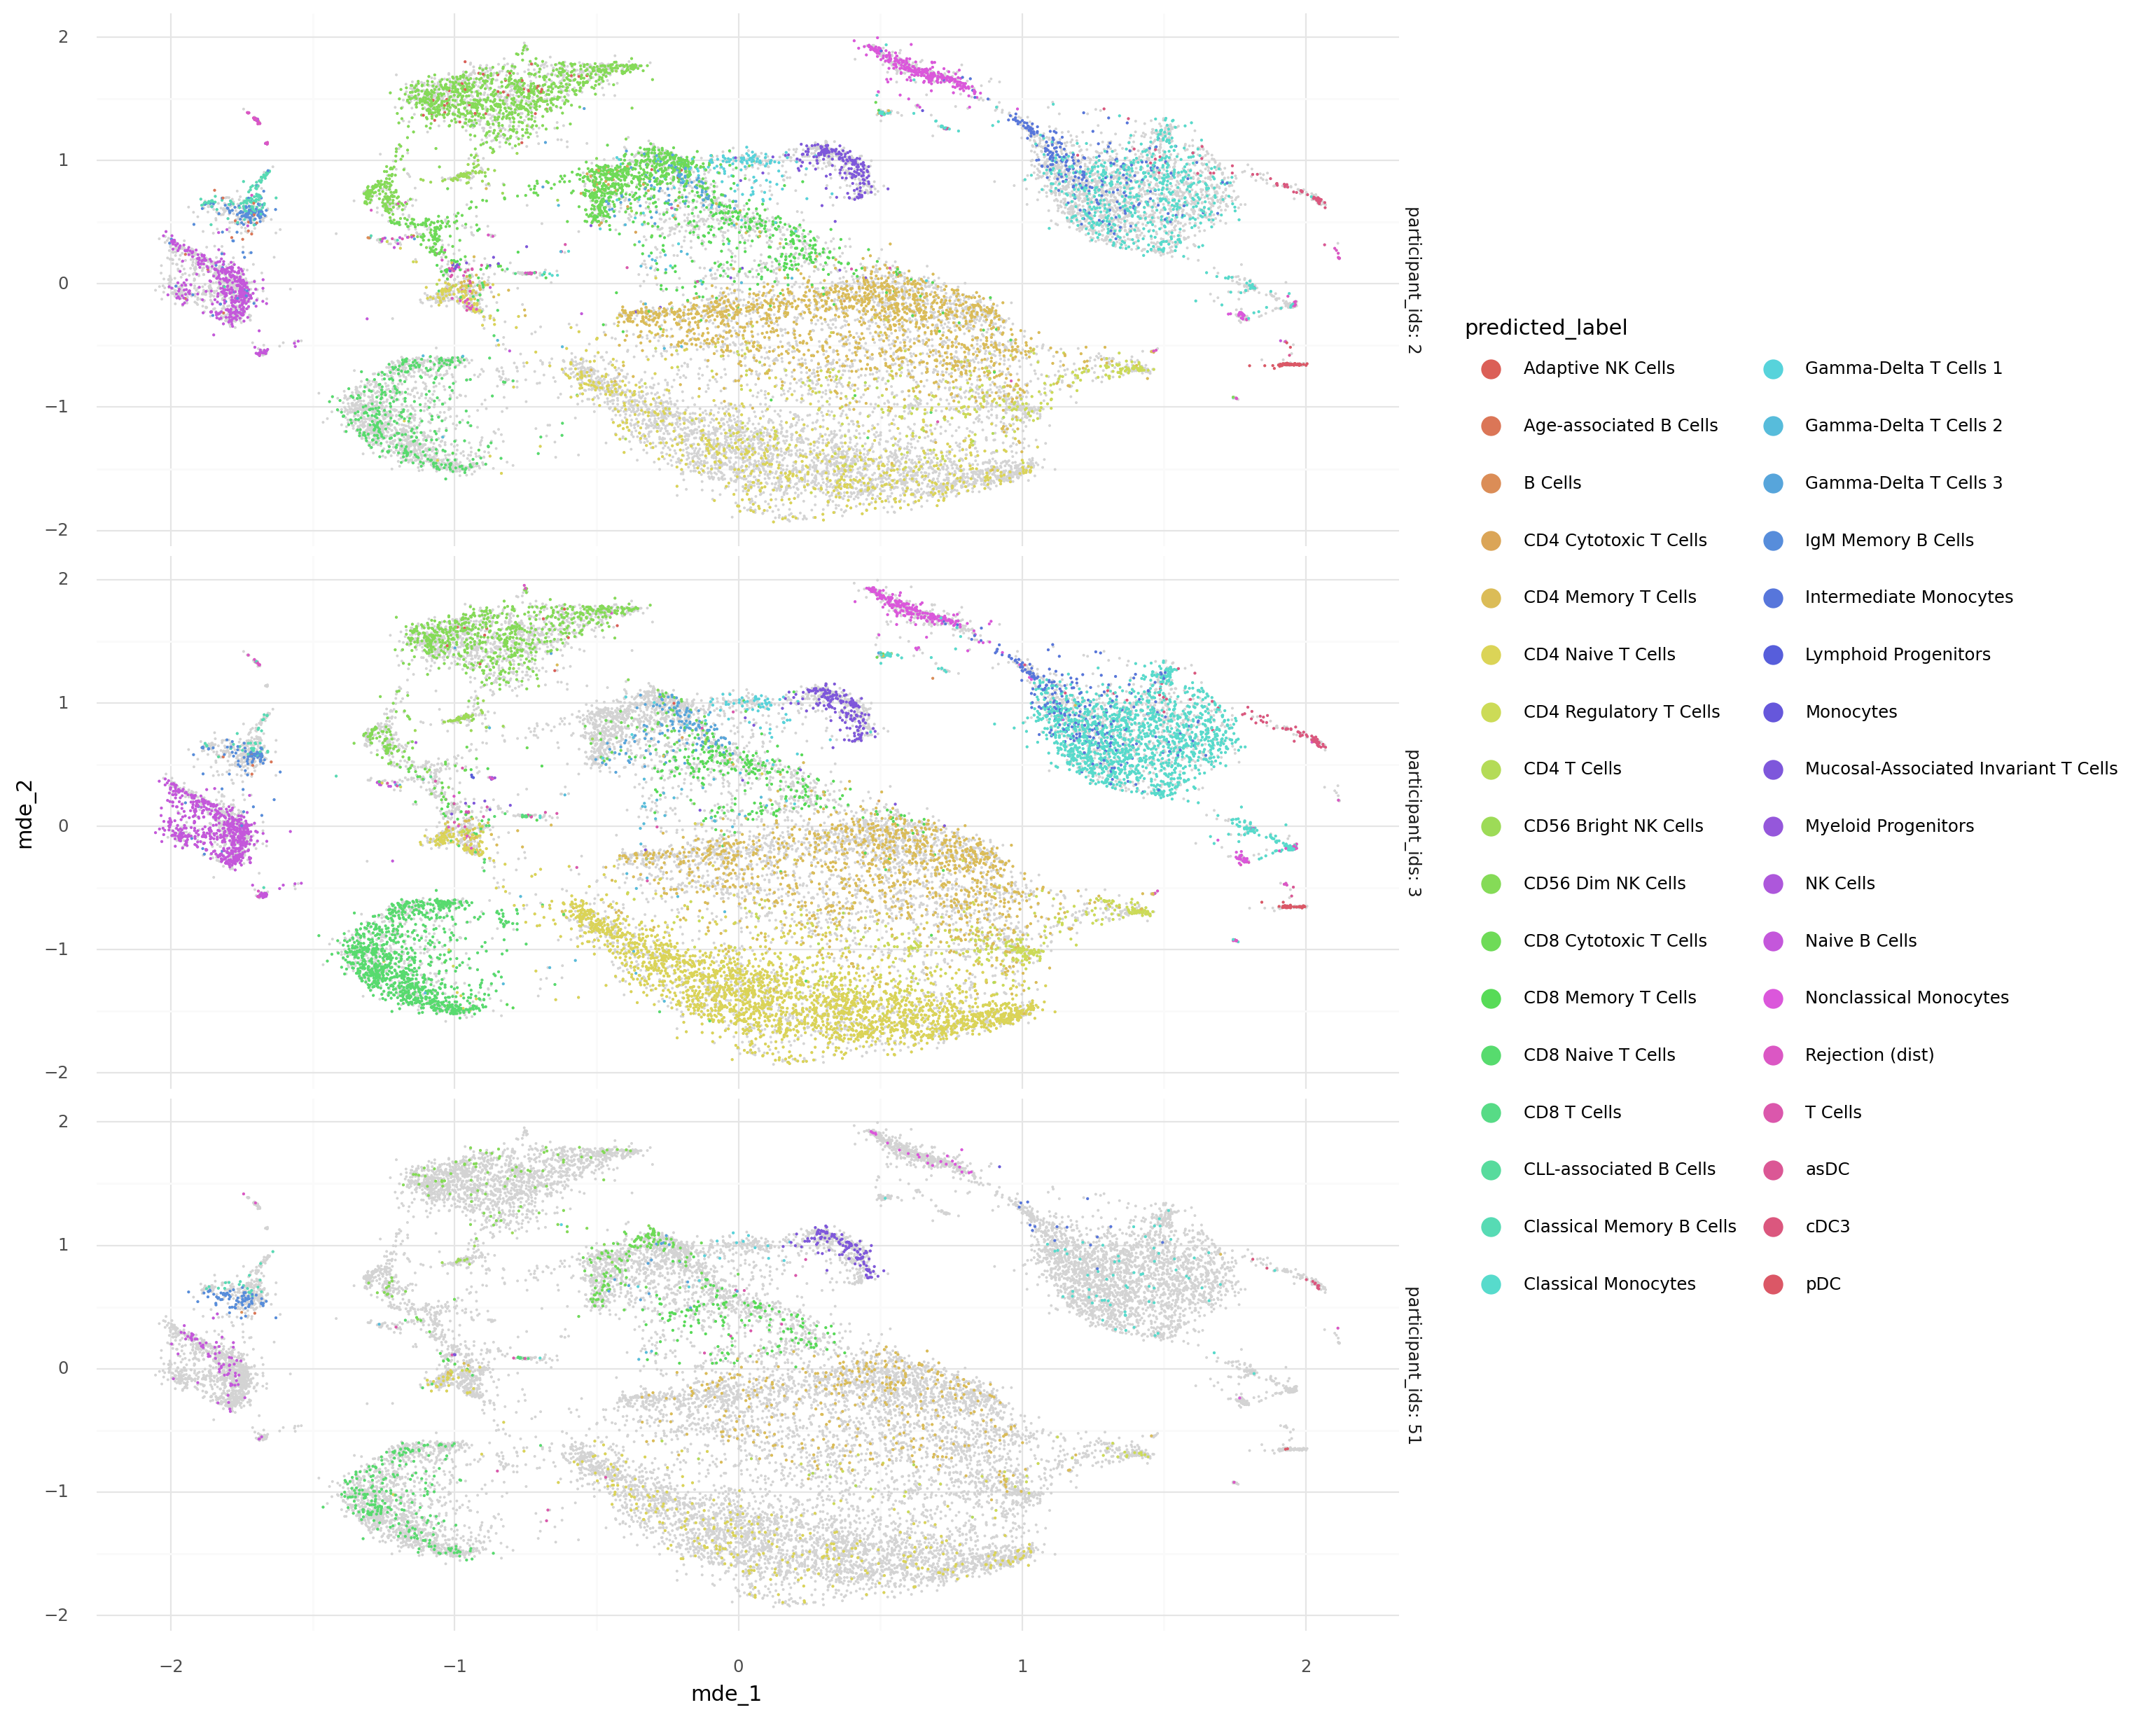

In [27]:
p.options.figure_size = 12, 15

tmp_ = adata.obs.sample(20_000)

p_ = (
    p.ggplot(p.aes(x = 'mde_1', y = 'mde_2', color = 'predicted_label'), tmp_)
    + p.geom_point(shape = '.', size = 0.1, color = 'lightgrey', data = tmp_.drop(['participant_ids'], axis = 1))
    + p.geom_point(shape = '.', size = 0.2)
    + p.theme_minimal()
    + p.guides(color = p.guide_legend(override_aes = {'size': 10}))
    + p.facet_grid('participant_ids ~ .', labeller = 'label_both')
)

p_.save('fig4.png', dpi = 300)

print(p_)

In [28]:
def get_depth_first_order(tree):

    label_order = []
    depth = 0 - 1

    def depth_first_order(node, label_order, depth):
        depth += 1
        label_order += [{'name': node.name[0], 'depth': depth}]

        for child in node.descendants:
            depth_first_order(child, label_order, depth)
            
        depth -= 1
            
    depth_first_order(tree[0], label_order, depth)
    
    return pd.DataFrame(label_order).reset_index().rename(columns = {'index': 'order'})

In [29]:
label_order = get_depth_first_order(tree1)

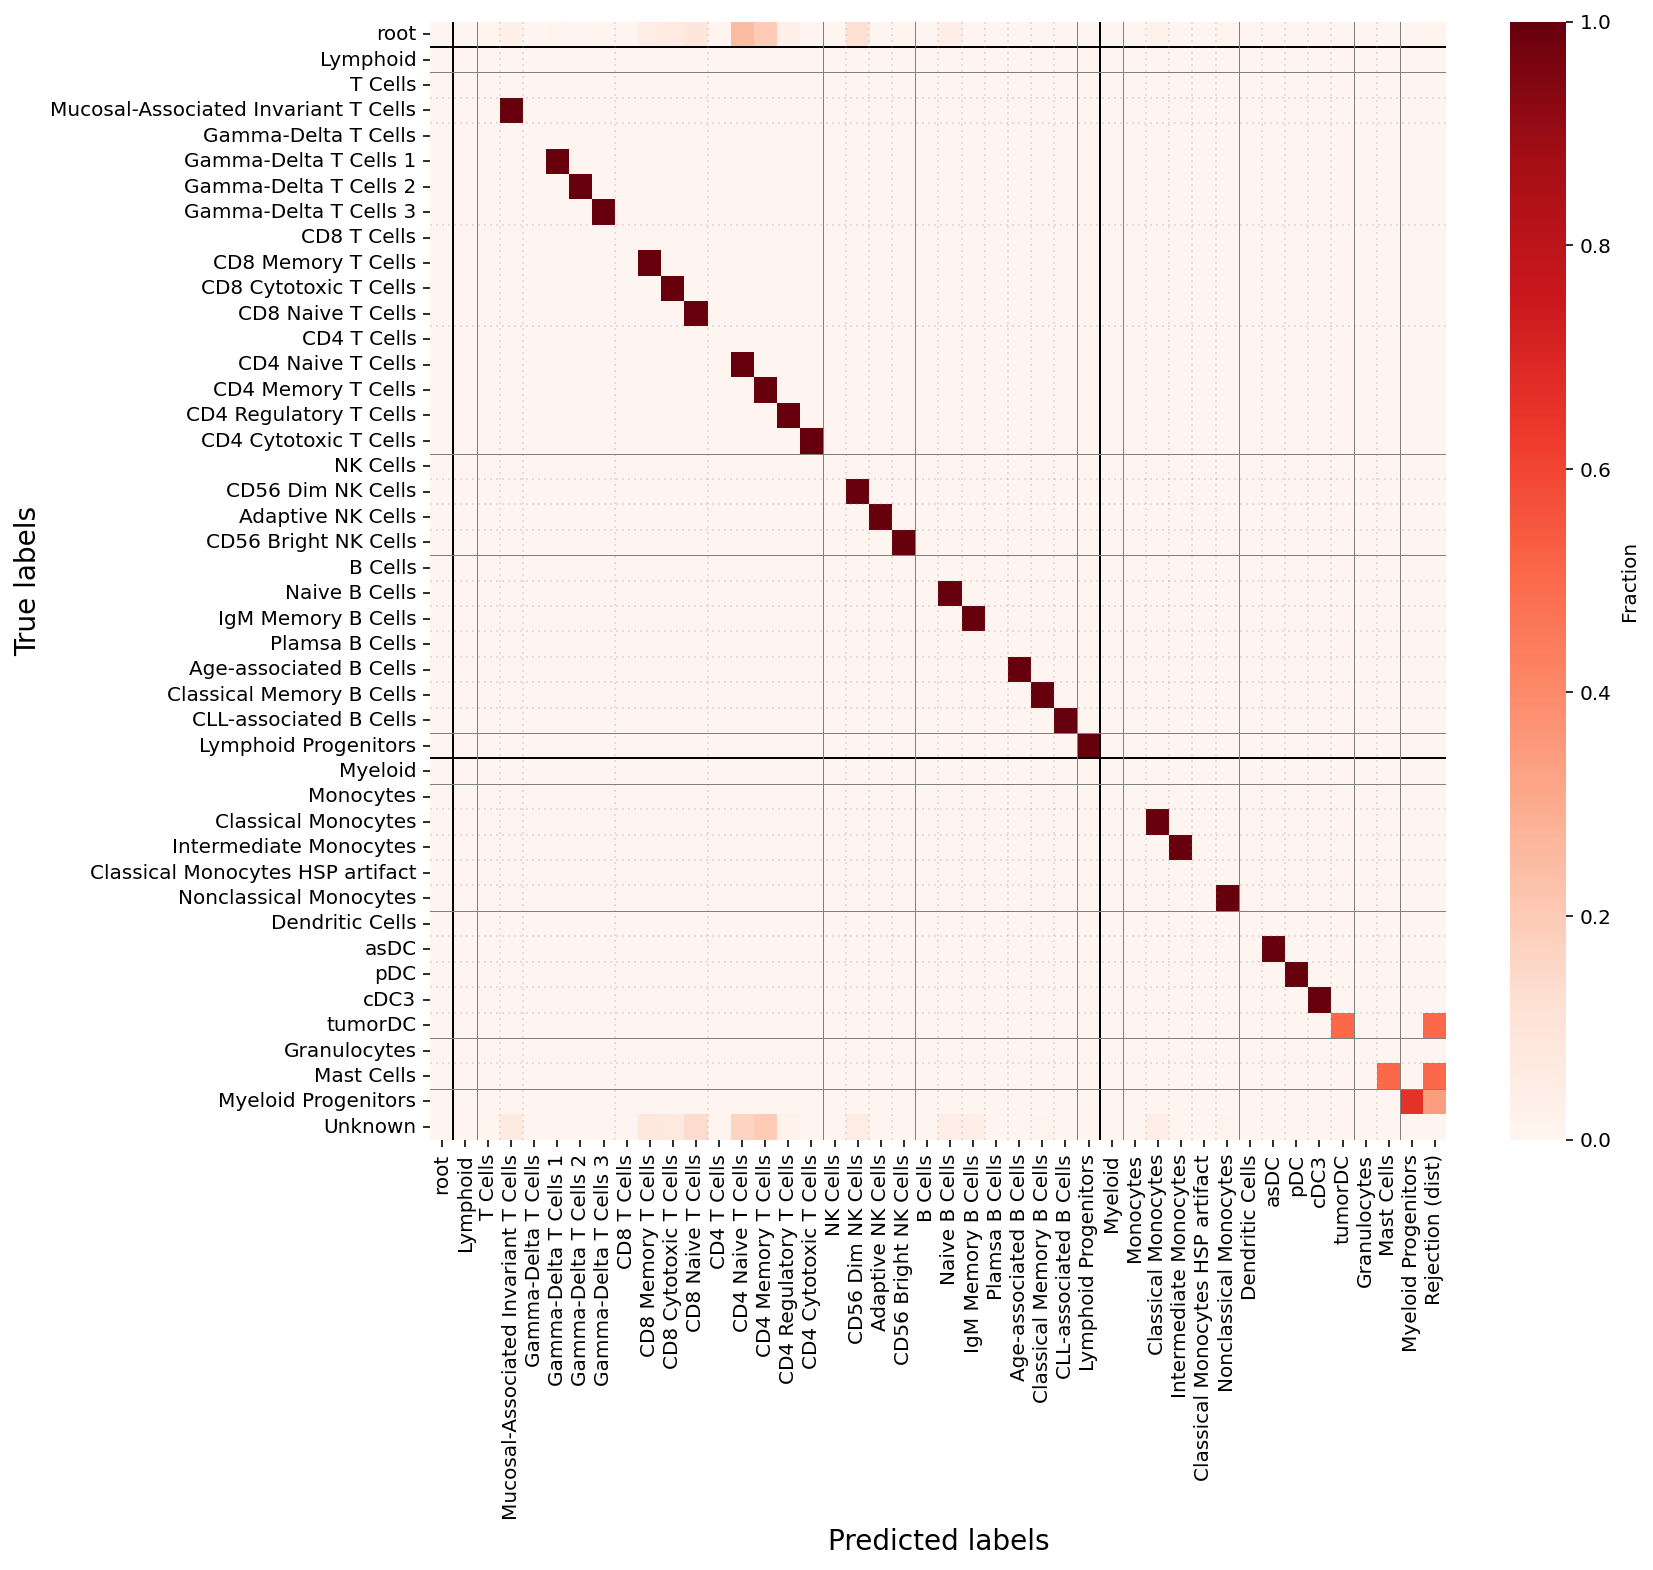

In [30]:
scHPL.evaluate.heatmap(
    adata.obs['tree_label'],
    adata.obs['predicted_label'],
    order_rows = label_order['name'].to_list() + ['Unknown'],
    order_cols = label_order['name'].to_list() + ['Rejection (dist)'],
    shape = (12, 11)
)

for i in label_order.query('depth == 1')['order'].values:
    plt.axhline(i, color = 'black', lw = 1)
    plt.axvline(i, color = 'black', lw = 1)
    
for i in label_order.query('depth == 2')['order'].values:
    plt.axhline(i, color = 'grey', lw = 0.5)
    plt.axvline(i, color = 'grey', lw = 0.5)
    
for i in label_order.query('depth == 3')['order'].values:
    plt.axhline(i, color = 'grey', lw = 0.2, ls = (0, (5, 10)))
    plt.axvline(i, color = 'grey', lw = 0.2, ls = (0, (5, 10)))
    
plt.tight_layout()

plt.savefig('fig5.png', dpi = 300)

In [31]:
for r in (
    adata.obs
    .query('participant_ids == 51')
    .groupby(['cell_type_level_4', 'predicted_label'], observed = True)
    .size()
    .reset_index()
    .iterrows()
):
    print(r[1].values)

['Adaptive NK Cells' 'CD56 Bright NK Cells' 1]
['Adaptive NK Cells' 'CD56 Dim NK Cells' 8]
['Adaptive NK Cells' 'CD8 Cytotoxic T Cells' 4]
['Adaptive NK Cells' 'Gamma-Delta T Cells 1' 1]
['Adaptive NK Cells' 'Gamma-Delta T Cells 3' 1]
['Age-associated B Cells' 'Age-associated B Cells' 2]
['Age-associated B Cells' 'B Cells' 1]
['Age-associated B Cells' 'IgM Memory B Cells' 2]
['Age-associated B Cells' 'Naive B Cells' 2]
['CD4 Cytotoxic T Cells' 'CD8 Memory T Cells' 1]
['CD4 Cytotoxic T Cells' 'Mucosal-Associated Invariant T Cells' 1]
['CD4 Memory T Cells' 'CD4 Memory T Cells' 1169]
['CD4 Memory T Cells' 'CD4 Naive T Cells' 29]
['CD4 Memory T Cells' 'CD4 Regulatory T Cells' 9]
['CD4 Memory T Cells' 'CD4 T Cells' 11]
['CD4 Memory T Cells' 'CD8 Memory T Cells' 23]
['CD4 Memory T Cells' 'Gamma-Delta T Cells 1' 1]
['CD4 Memory T Cells' 'Mucosal-Associated Invariant T Cells' 3]
['CD4 Memory T Cells' 'T Cells' 4]
['CD4 Naive T Cells' 'CD4 Memory T Cells' 33]
['CD4 Naive T Cells' 'CD4 Naive T C

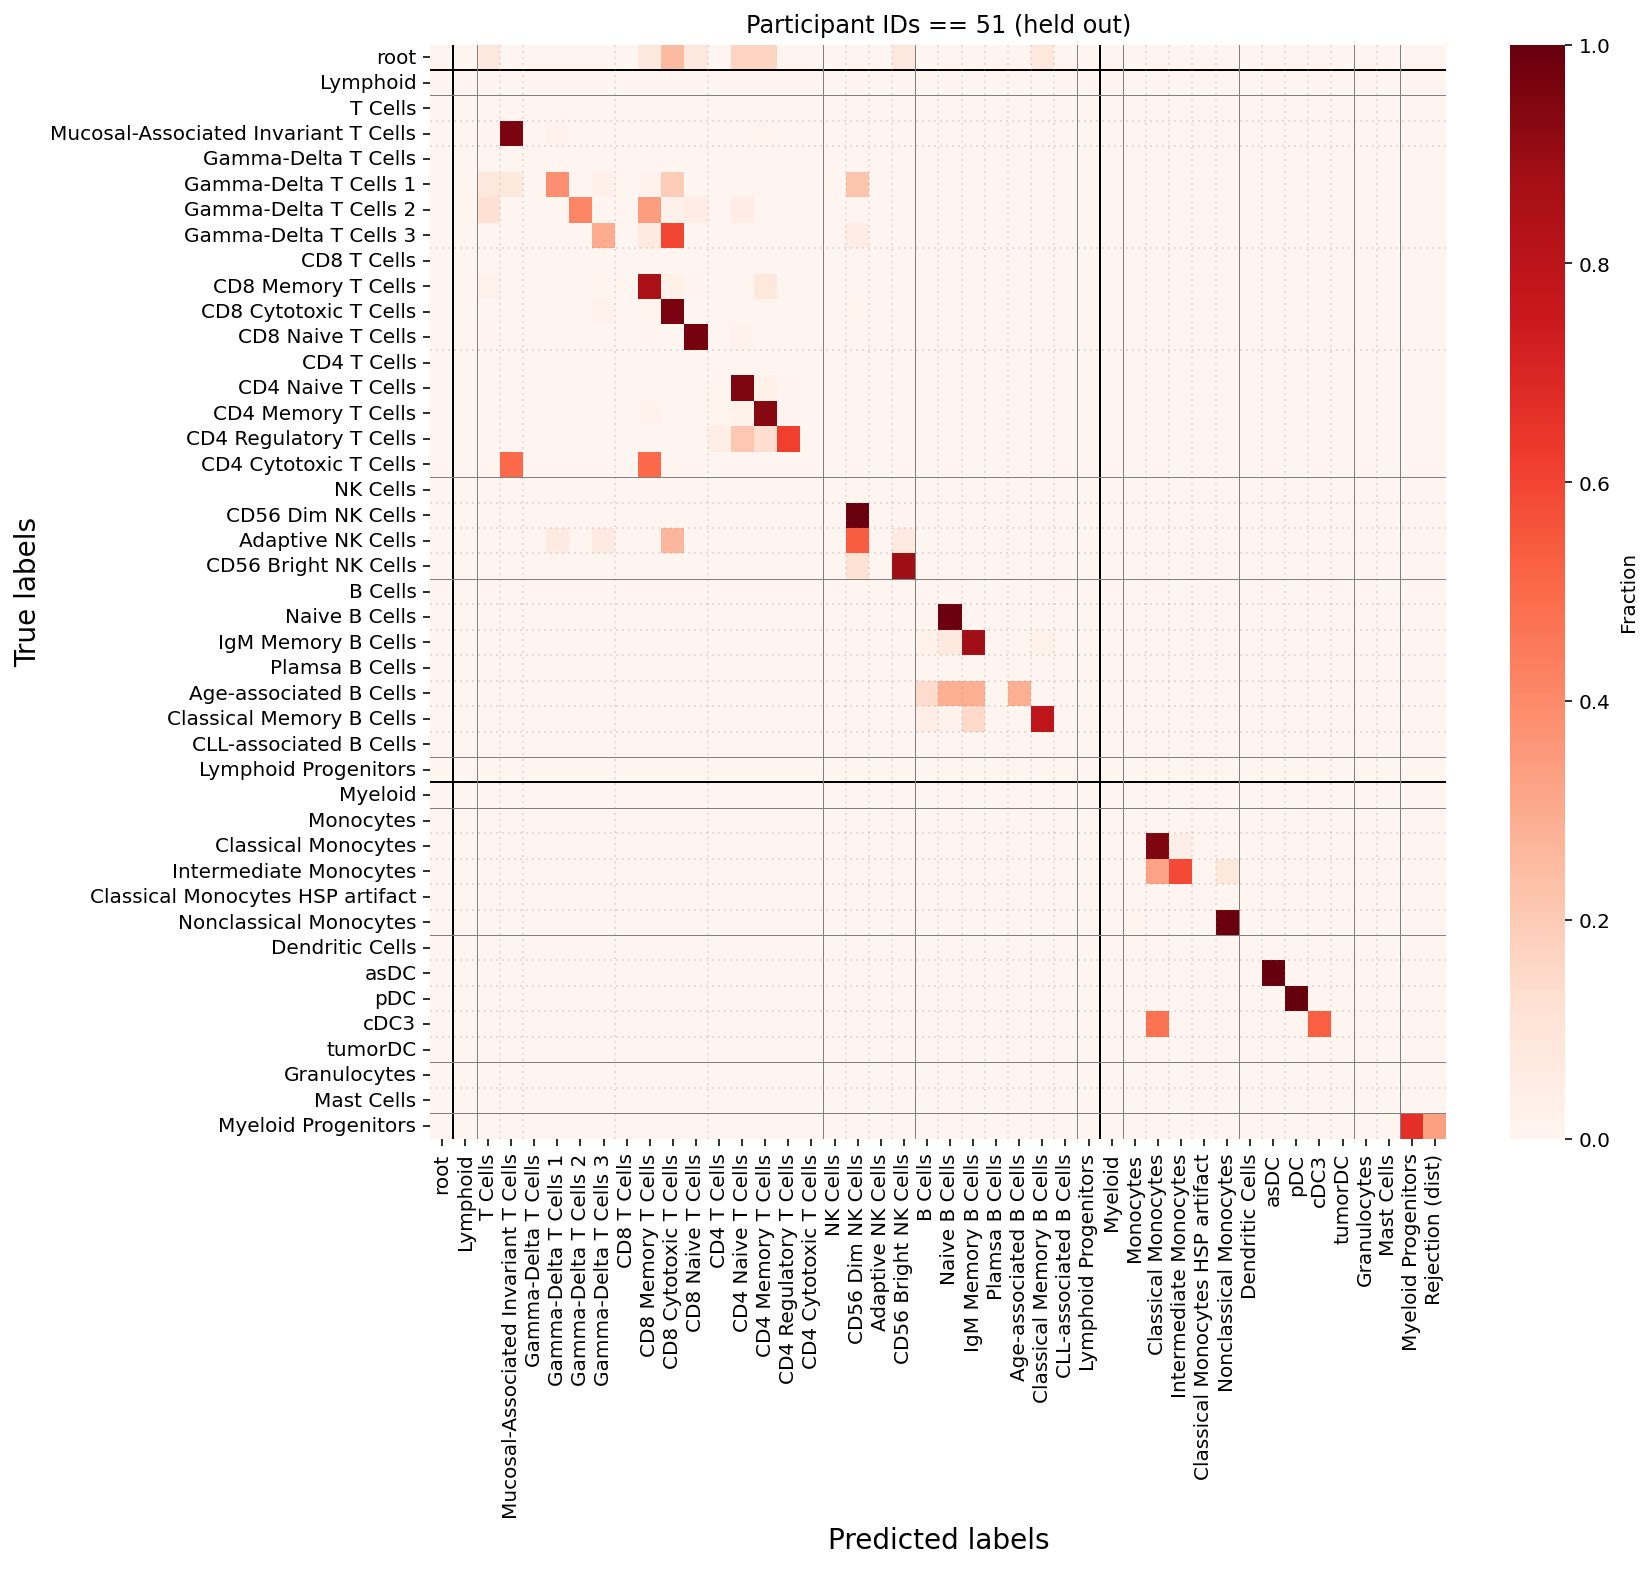

In [32]:
scHPL.evaluate.heatmap(
    adata.obs.query('participant_ids == 51')['cell_type_level_4'],
    adata.obs.query('participant_ids == 51')['predicted_label'],
    order_rows = label_order['name'].to_list(),
    order_cols = label_order['name'].to_list() + ['Rejection (dist)'],
    title = 'Participant IDs == 51 (held out)',
    shape = (12, 11)
);


for i in label_order.query('depth == 1')['order'].values:
    plt.axhline(i, color = 'black', lw = 1)
    plt.axvline(i, color = 'black', lw = 1)
    
for i in label_order.query('depth == 2')['order'].values:
    plt.axhline(i, color = 'grey', lw = 0.5)
    plt.axvline(i, color = 'grey', lw = 0.5)
    
for i in label_order.query('depth == 3')['order'].values:
    plt.axhline(i, color = 'grey', lw = 0.2, ls = (0, (5, 10)))
    plt.axvline(i, color = 'grey', lw = 0.2, ls = (0, (5, 10)))
    
plt.tight_layout()

plt.savefig('fig6.png', dpi = 300)